In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from fit_pesato_3 import fit

In [3]:
file_name = r"sht75_nblab03_Hum_Temp_RUN_20221221080550_1_h.txt"
data_all = pd.read_csv(file_name, sep=" ", header=0)


In [4]:
d = data_all.drop(index = 0)
data = d.reset_index()

In [5]:
data["temp_corr"][0]

21.84

In [6]:
len(data)

28251

Fin qua ho solo tolto la prima riga, importato i pacchetti e i dati. Niente di importante


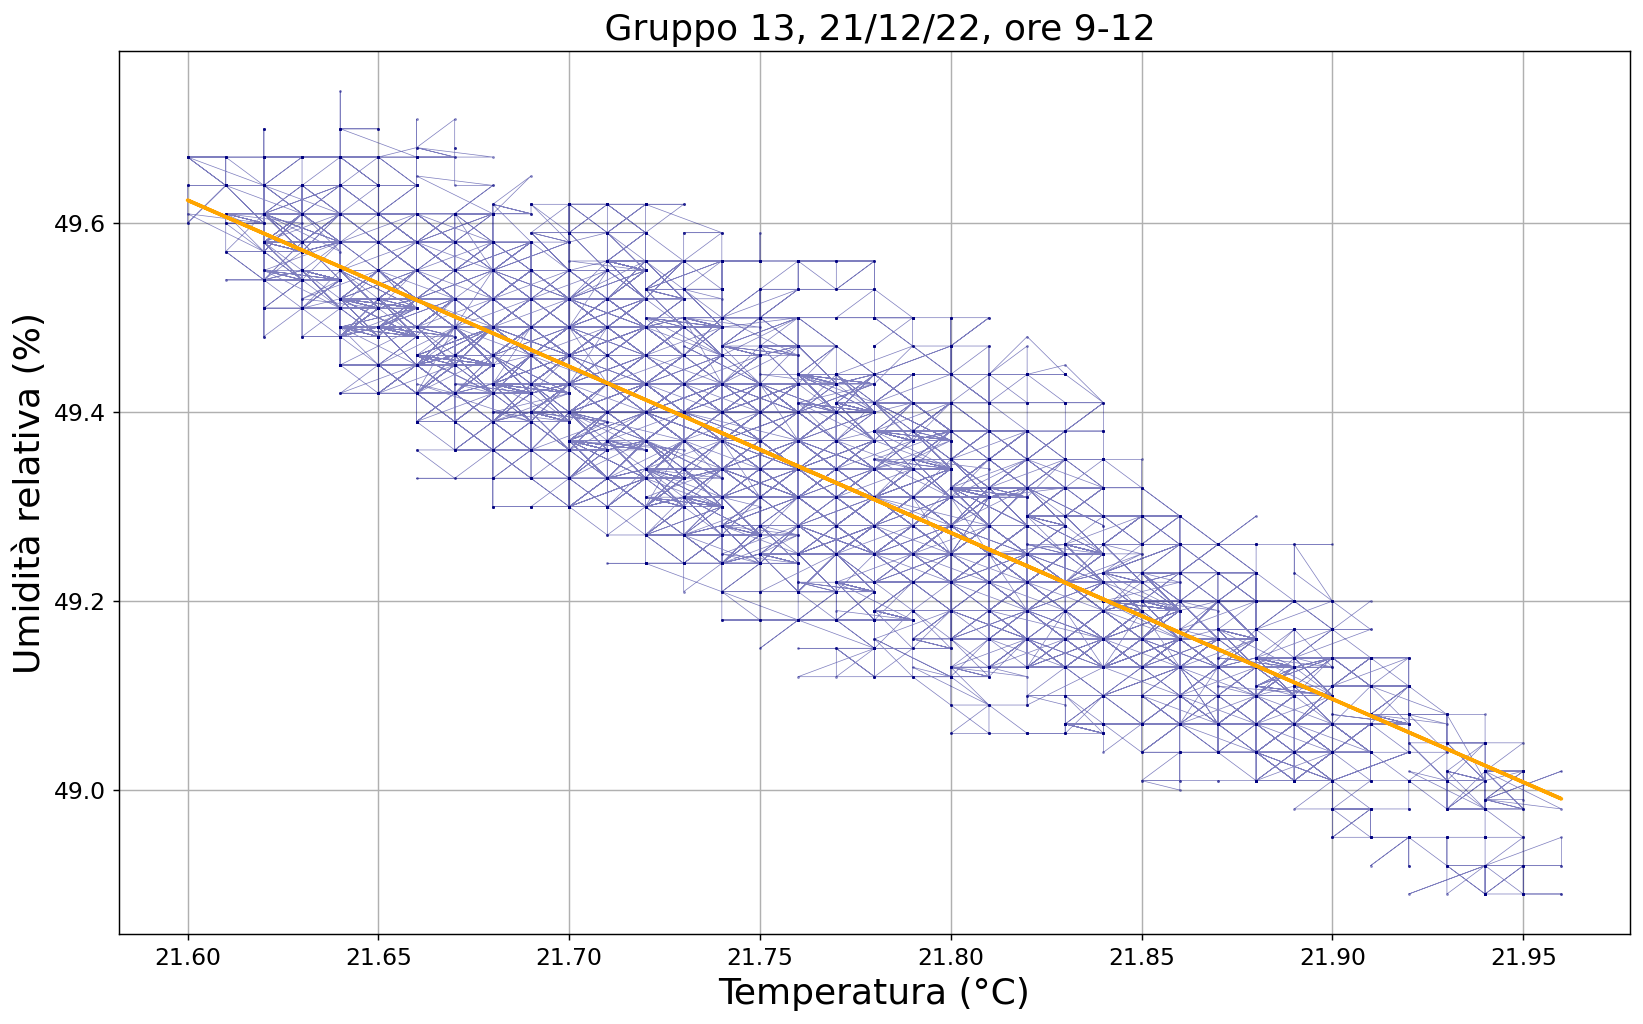

In [7]:
plt.figure(figsize =(15,9),dpi = 130)
plt.plot(data["temp_corr"] , data["RH_true"] , "-o",  alpha = 0.5, color = "navy", markersize  =0.5, linewidth = 0.4)
plt.xlabel("Temperatura (°C)", fontsize = 20)
plt.ylabel("Umidità relativa (%)", fontsize = 20)
#plt.ylim(58.4,58.9)
plt.title(" Gruppo 13, 21/12/22, ore 9-12", fontsize = 20)
e = [0.01 for i in range (len(data["temp_corr"]))]
result = fit(data["temp_corr"], data["RH_true"], e)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
m, q = result[1], result[0]
retta = [ m*i +q for i in data["temp_corr"] ]
plt.grid(True)
plt.plot(data["temp_corr"] , retta, color = "orange", linewidth= 2)


Si può calcolare ora la correlazione tra queste due grandezze


In [8]:
Pearson = data["temp_corr"].corr( data["RH_true"])
print(Pearson)

-0.8791900914556948


 Il risultato è negativo, come atteso, ed è a elevato. Si può calcolare l'errore sulla correlazione grazie alla formula $\sigma_\rho = \sqrt{\frac{1- \rho^2}{n-2}} $


In [9]:
n = len(data["temp_corr"])
delta_rho = np.sqrt((1-Pearson**2)/(n-2))
print(delta_rho)

0.0028348827114138384


Insomma $\rho = -0.879 \pm 0.003$ per tutto il dataset.

Text(0, 0.5, 'Umidità (%)')

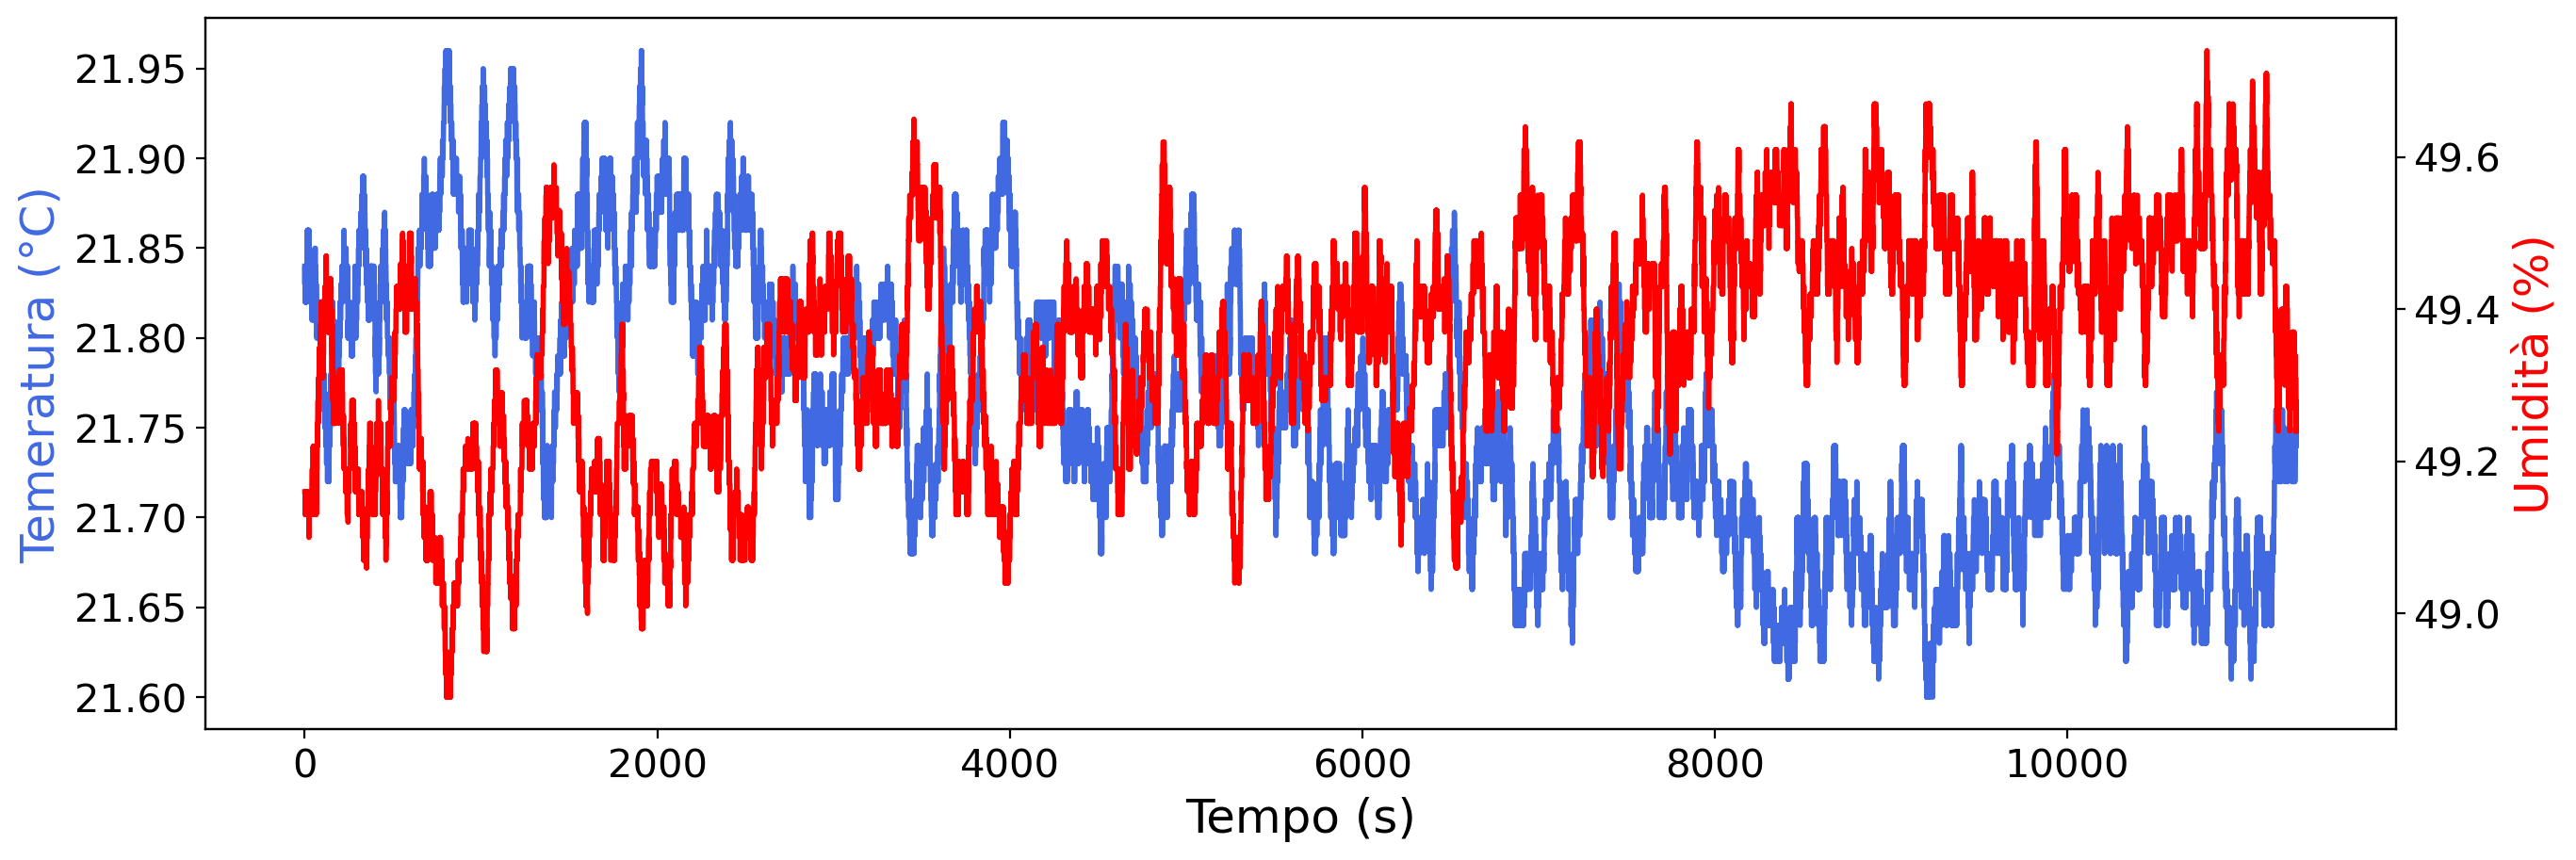

In [10]:
time = [i*0.4 for i in range(len(data["temp_corr"]))]
fig,ax = plt.subplots(figsize=(15, 5), dpi= 200)
ax.set_ylabel("Temeratura (°C)", color = "royalblue", fontsize= 18)
ax.plot(time, data["temp_corr"] , color = "royalblue", linewidth = 2 )
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

ax2 = ax.twinx()
ax2.plot(time, data["RH_true"] , color = "red",label ="Umidità (%)", linewidth = 2  )
ax.set_xlabel("Tempo (s)", fontsize= 18)
plt.yticks(fontsize= 15)
ax2.set_ylabel("Umidità (%)",color = "red", fontsize= 18)


Text(0, 0.5, 'Temeratura (°C)')

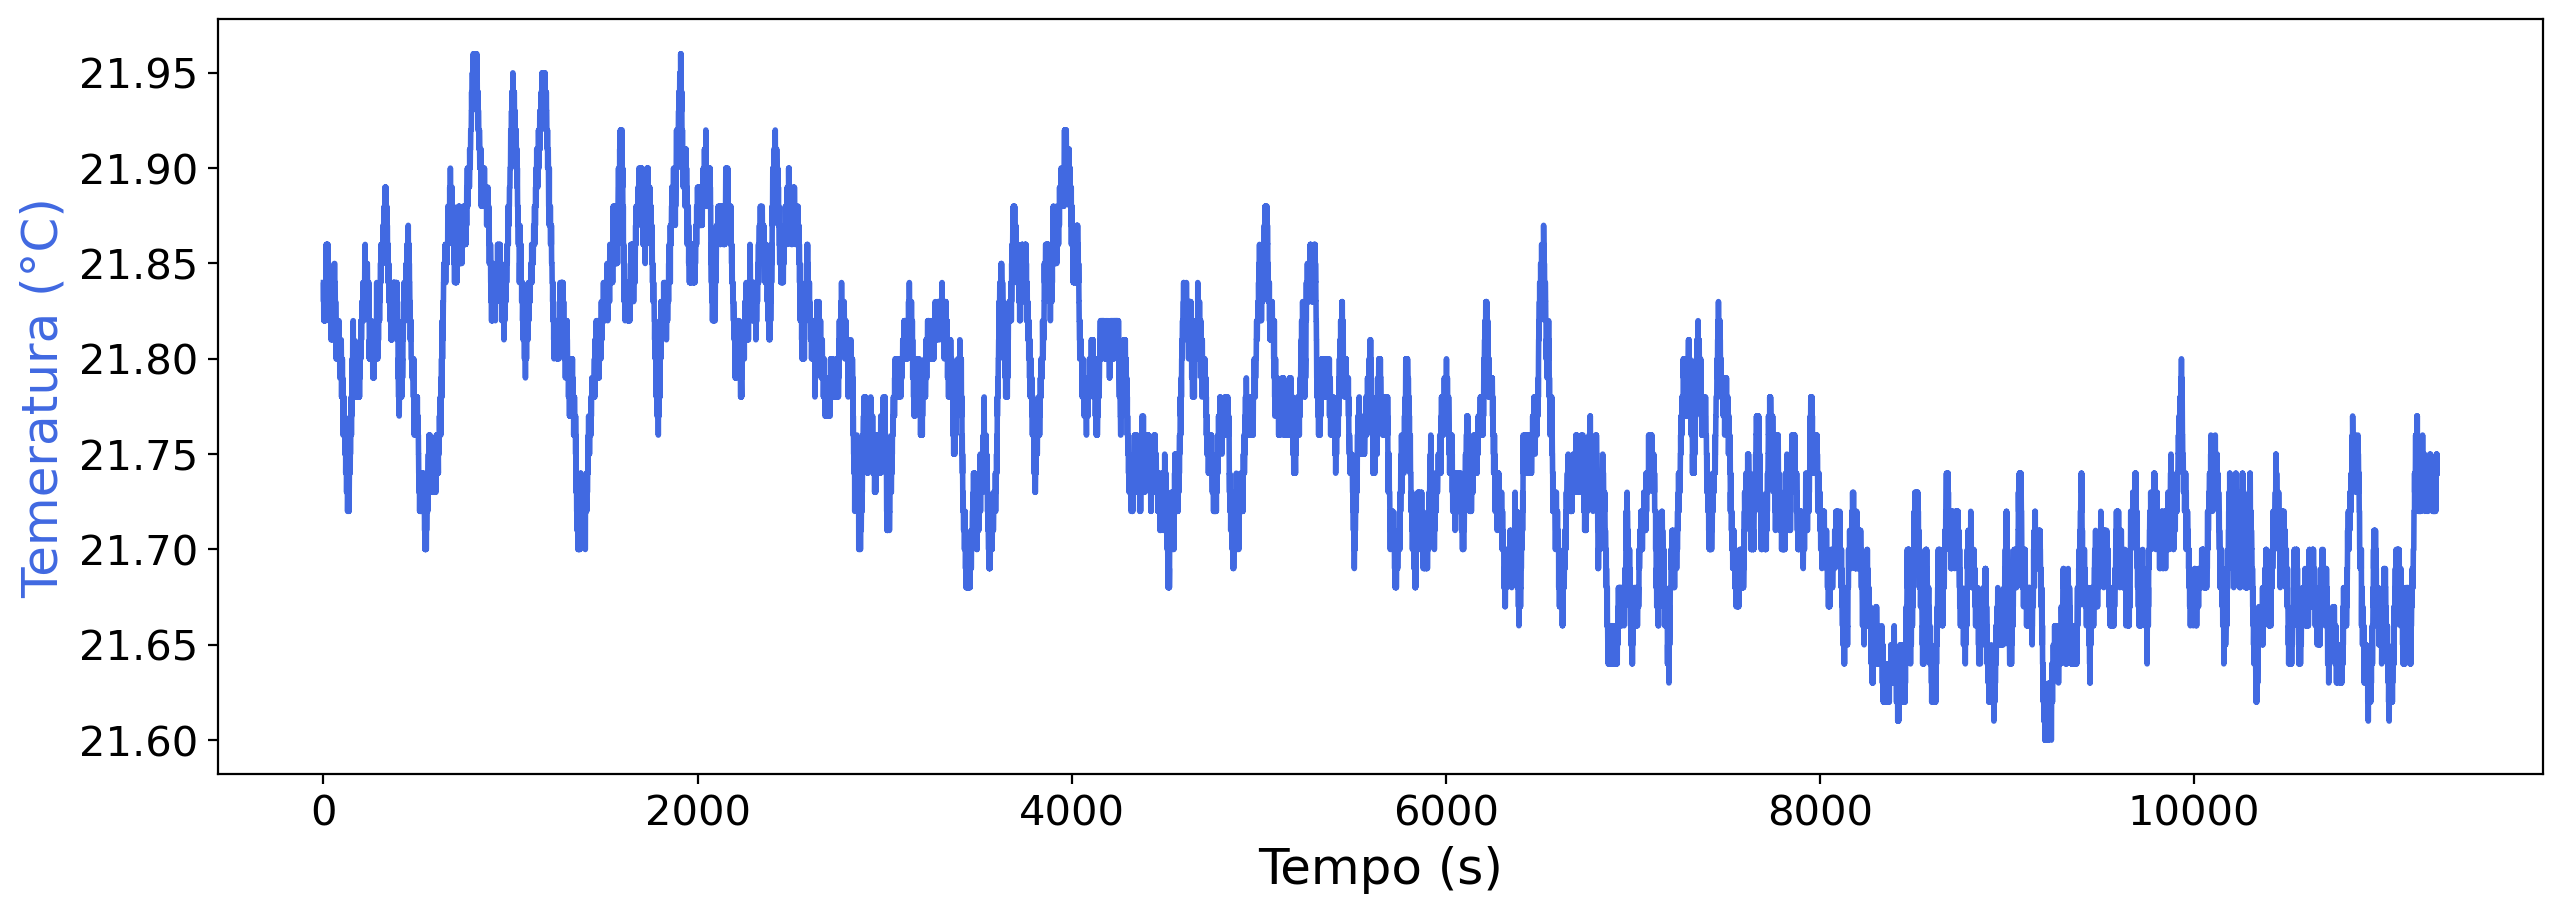

In [11]:
plt.figure(figsize=(15, 5), dpi= 200)
plt.plot(time, data["temp_corr"] , color = "royalblue", linewidth = 2 )
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel("Tempo (s)", fontsize= 18)
plt.ylabel("Temeratura (°C)", color = "royalblue", fontsize= 18)

Text(0, 0.5, 'Umidità (%)')

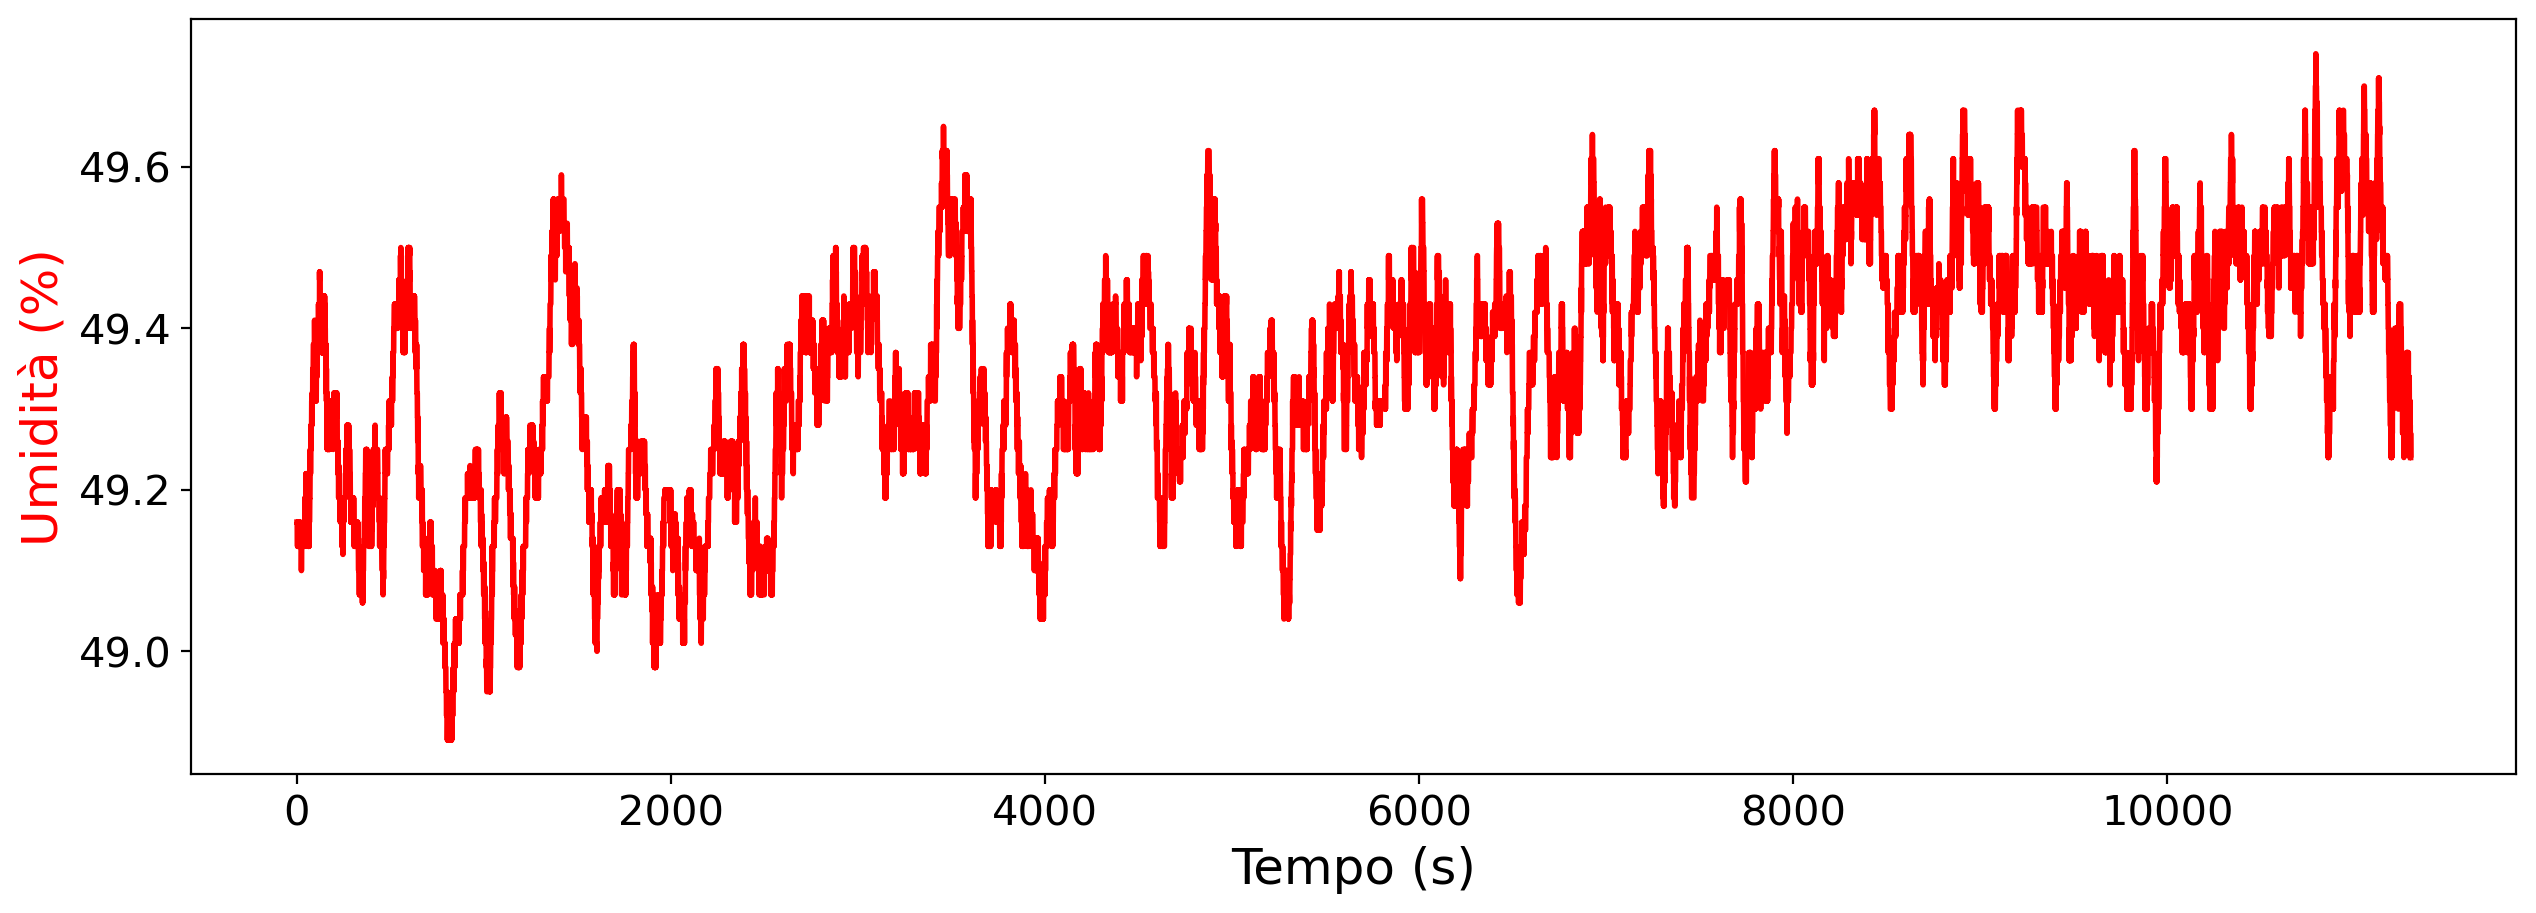

In [12]:
plt.figure(figsize=(15, 5), dpi= 200)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.plot(time, data["RH_true"] , color = "red",label ="Umidità (%)", linewidth = 2  )
plt.xlabel("Tempo (s)", fontsize= 18)
plt.ylabel("Umidità (%)",color = "red", fontsize= 18)

Il tempo a metà acquisizione è di circa 5650 secondi. Vediamo di dividere il precedente plot in due più piccoli

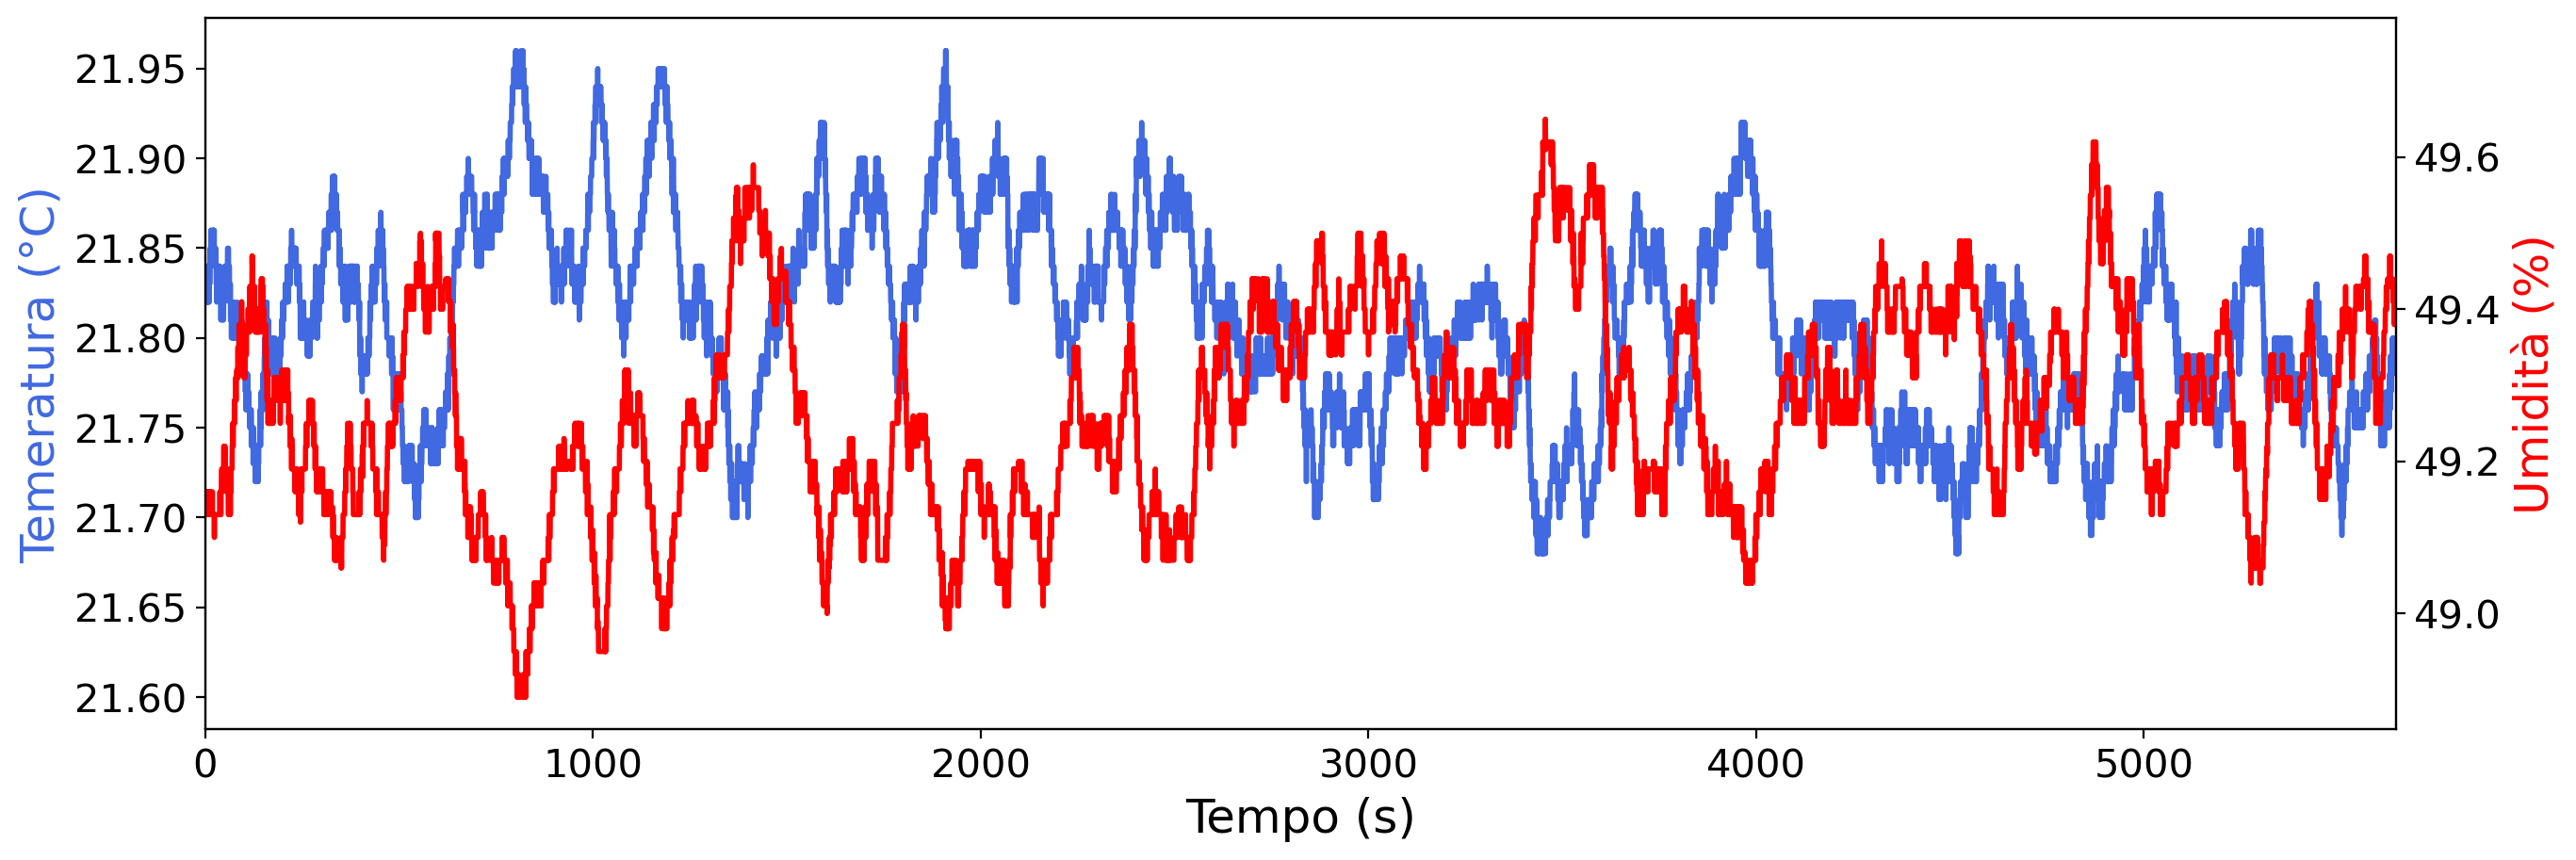

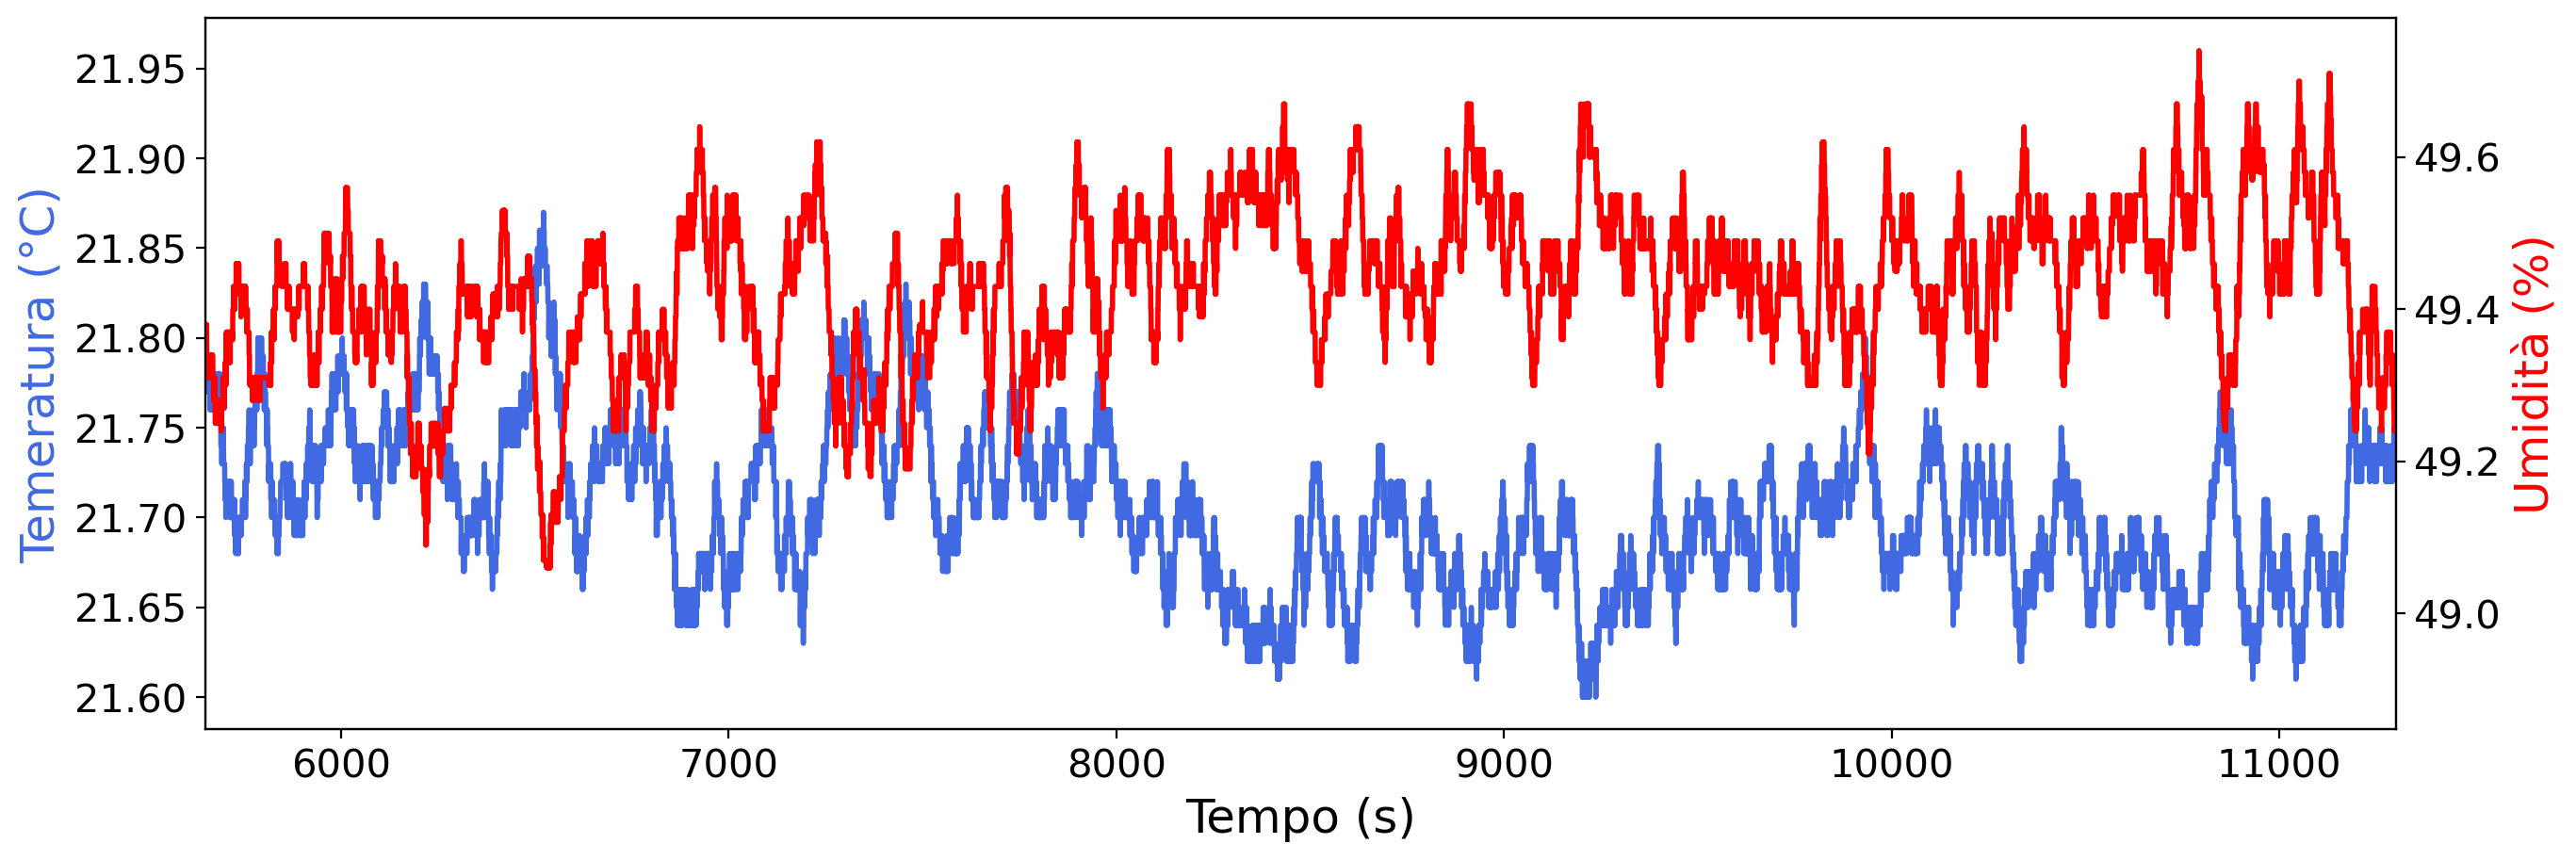

In [13]:
time = [i*0.4 for i in range(len(data["temp_corr"]))]
fig,ax = plt.subplots(figsize=(15, 5), dpi= 200)
ax.set_ylabel("Temeratura (°C)", color = "royalblue", fontsize= 18)
ax.plot(time, data["temp_corr"] , color = "royalblue", linewidth = 2 )
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

ax2 = ax.twinx()
ax2.plot(time, data["RH_true"] , color = "red",label ="Umidità (%)", linewidth = 2  )
ax.set_xlabel("Tempo (s)", fontsize= 18)
plt.yticks(fontsize= 15)
ax2.set_ylabel("Umidità (%)",color = "red", fontsize= 18)
plt.xlim(0,5650)
plt.show()
time = [i*0.4 for i in range(len(data["temp_corr"]))]
fig,ax = plt.subplots(figsize=(15, 5), dpi= 200)
ax.set_ylabel("Temeratura (°C)", color = "royalblue", fontsize= 18)
ax.plot(time, data["temp_corr"] , color = "royalblue", linewidth = 2 )
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)

ax2 = ax.twinx()
ax2.plot(time, data["RH_true"] , color = "red",label ="Umidità (%)", linewidth = 2  )
ax.set_xlabel("Tempo (s)", fontsize= 18)
plt.yticks(fontsize= 15)
ax2.set_ylabel("Umidità (%)",color = "red", fontsize= 18)
plt.xlim(5650,11301)
plt.show()

In questi due grafici si evidenzia un'anticorrelazione tra i due fenomeni, come ci si aspettava. Dividere in due il tempo aiuta a visualizzare meglio questa relazione. Possiamo ora graficare in funzione del tempo queste due grandezze


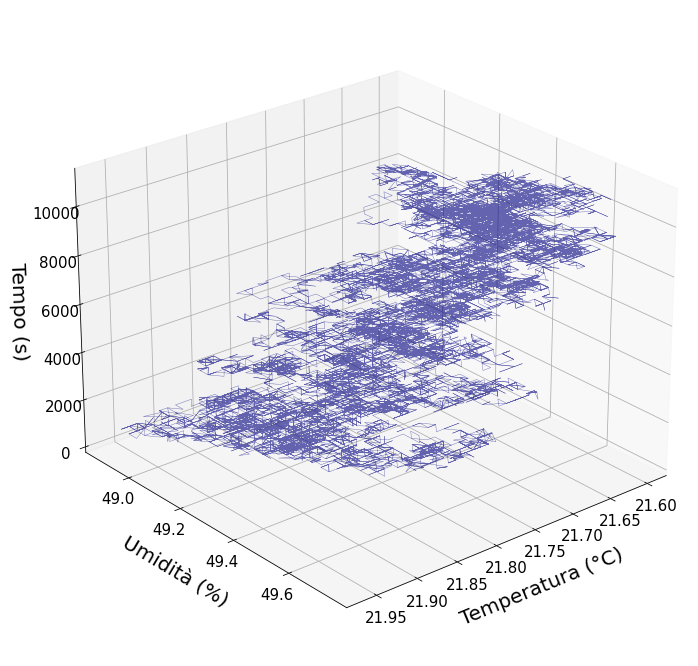

In [14]:
fig = plt.figure(figsize = (13,12))
ax = plt.axes(projection = '3d')

ax.plot3D(data["temp_corr"] , data["RH_true"] ,time,  alpha = 0.6, color = "navy", markersize  =0.5, linewidth = 0.4)
ax.view_init(25, 50)
ax.set_xlabel("Temperatura (°C)", fontsize = 20,labelpad = 15)
ax.set_ylabel("Umidità (%)" ,fontsize = 20,labelpad = 15)
ax.set_zlabel("Tempo (s)", fontsize = 20,labelpad = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax.zaxis.set_tick_params(labelsize=15)


Se devo dividere in 10 sottocampioni una presa dati di un po' più di 11000 dati, posso fare sì che questi siano di 1100. Qui manca la stima dell'errore sulla correlazione. Bisogna poi provare a fare il fit lineare su questi grafichetti




In [15]:
def error_corr(rho,n):
    return  np.sqrt((1-rho**2)/(n-2))
def retta(a,b,x):
    return a*x+b 


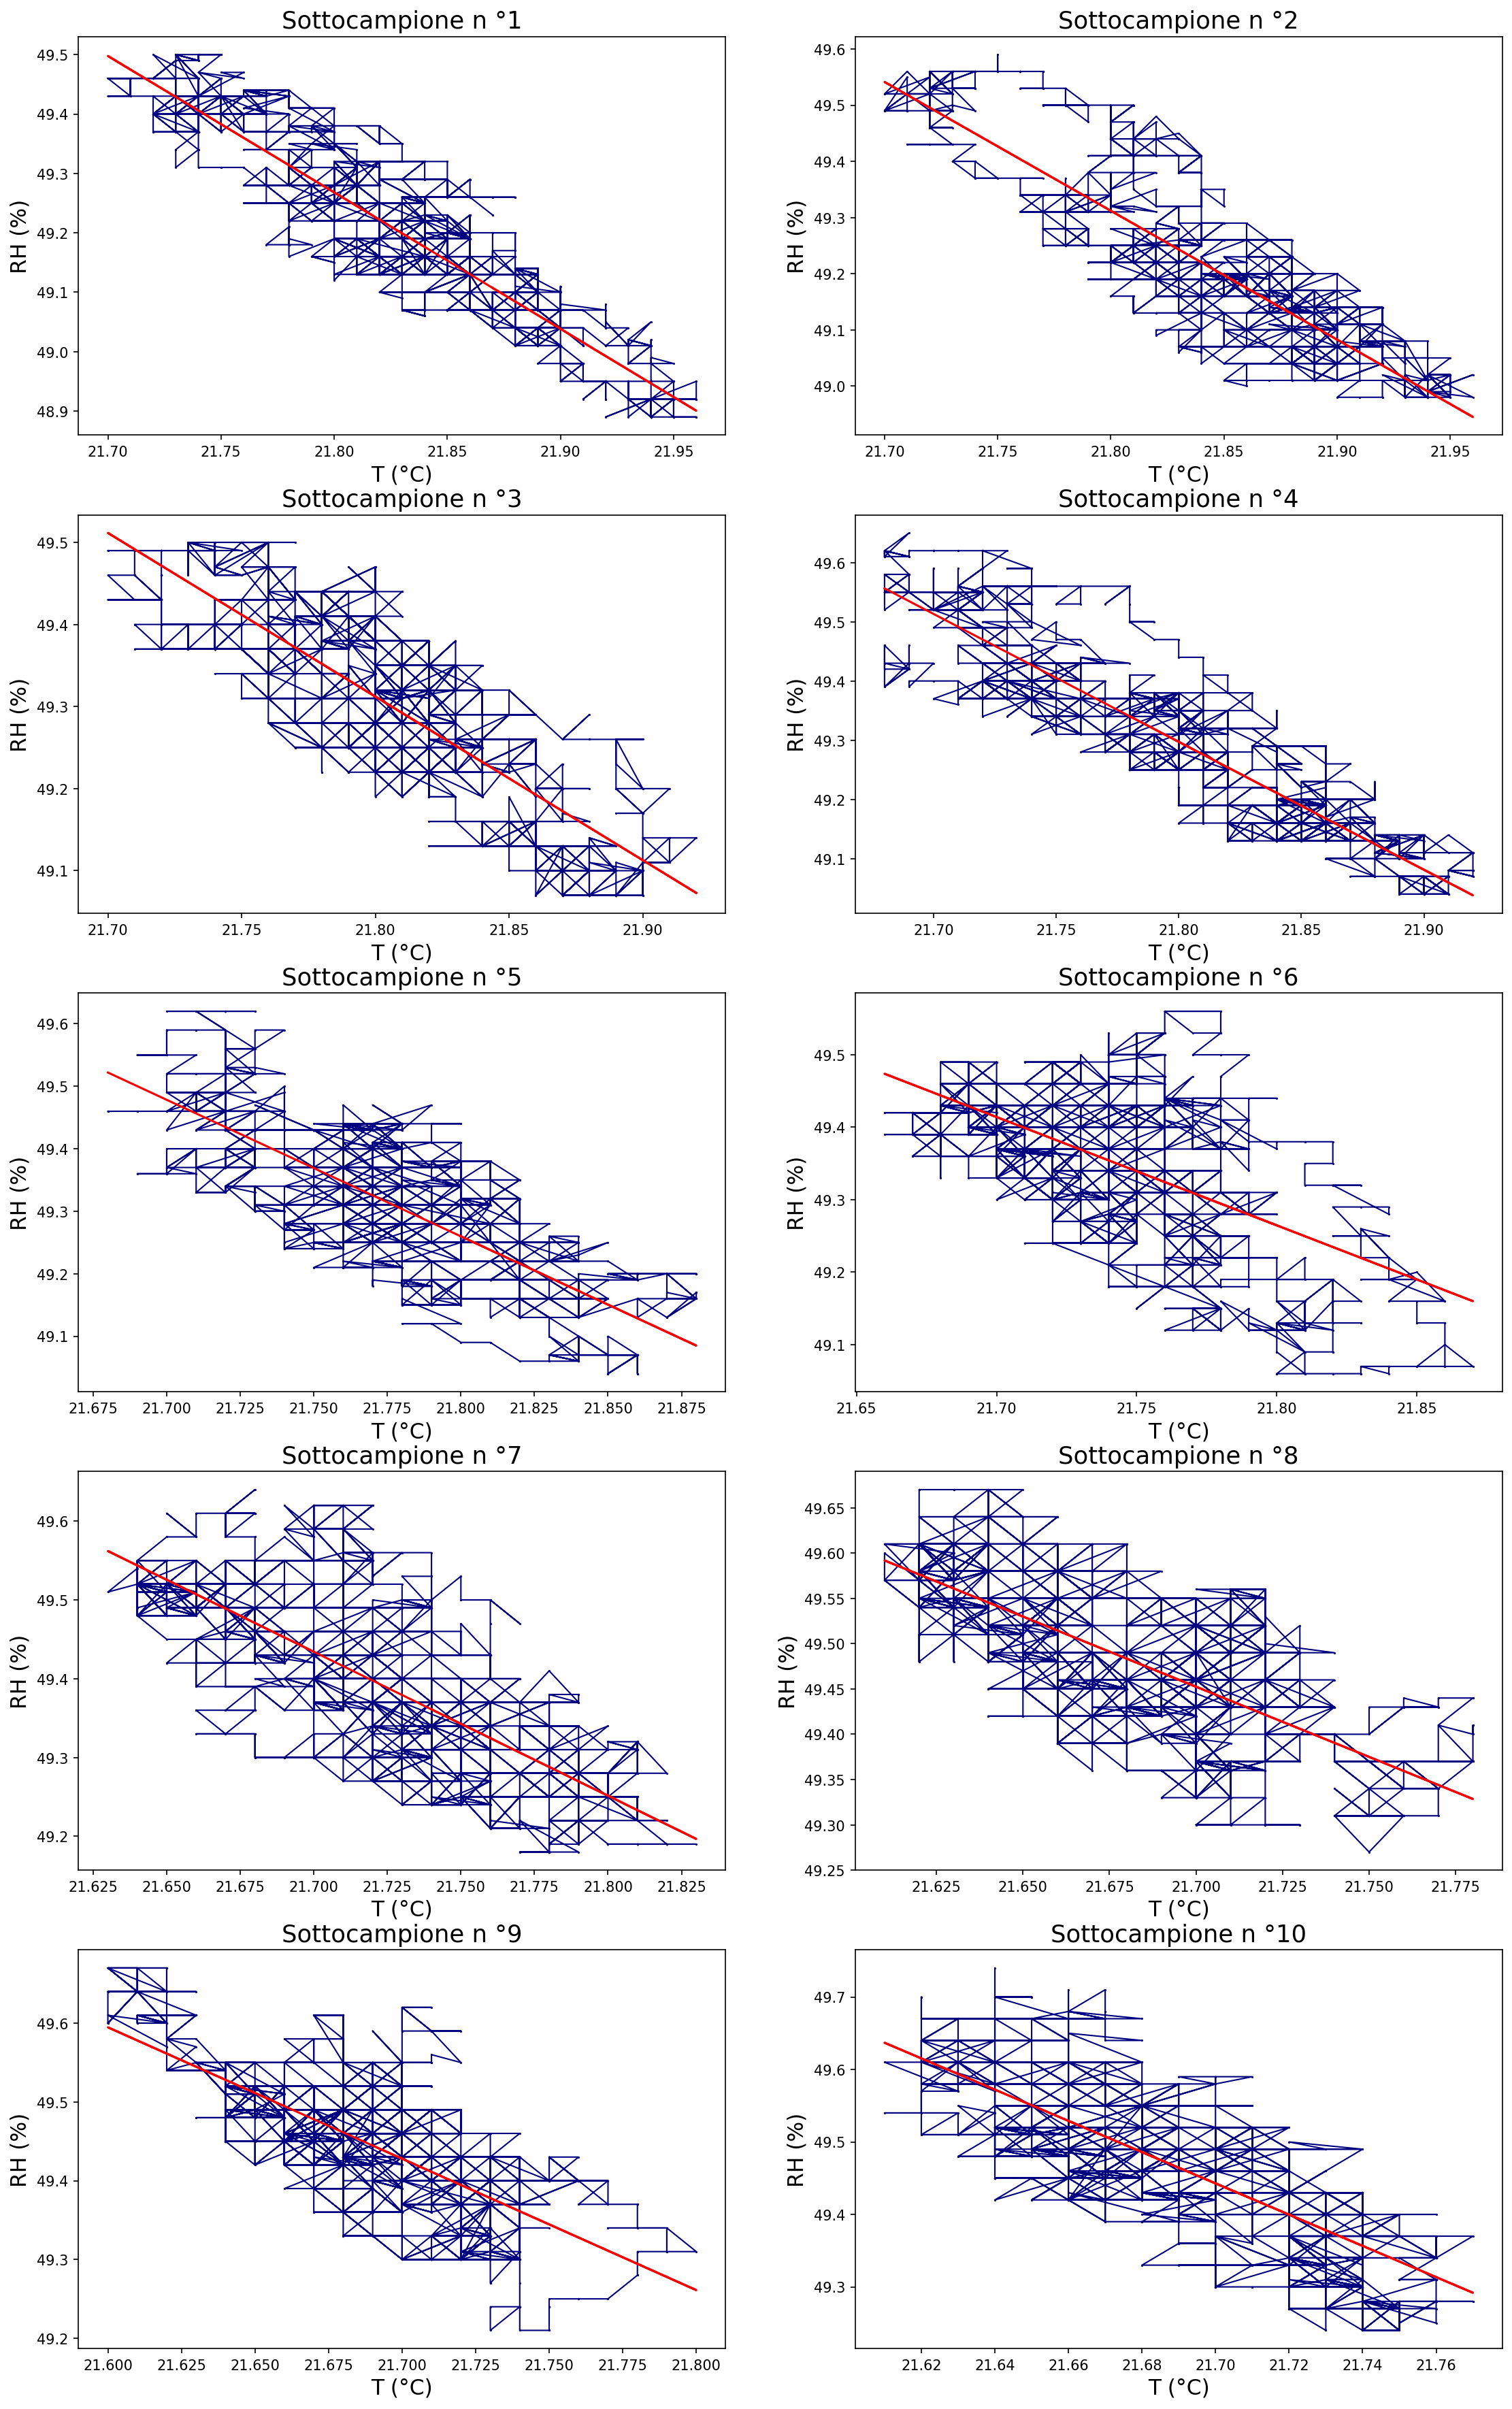

In [16]:
fig, axs = plt.subplots(5,2, figsize = (18,30), dpi = 150)
correlations_10 = []
correlations_errors_10= []
n_data = 2825
fits_10 = []
dataframe_10 = pd.DataFrame()
for q in range (10):
    j = q%2
    i = q//2
    
    step = q*n_data
    step_1 = step + n_data
    locx ,locy = list(data["temp_corr"][step:step_1]) , list(data["RH_true"][step:step_1])
    localdic = {"x_"+str(q): locx, "y_"+str(q): locy}
    axs[i,j].plot(locx ,locy , "-o", color = "navy", markersize  =0.5, linewidth = 1)
    axs[i,j].set_title("Sottocampione n °" + str(q+1), fontsize = 17)
    axs[i,j].set_ylabel("RH (%)", fontsize = 15)
    axs[i,j].set_xlabel("T (°C)", fontsize = 15)
    
    localdf= pd.DataFrame(localdic)
    params = fit(locx ,locy, 0.01)
    y_retta = [retta(params[1], params[0], i ) for i in locx]
    axs[i,j].plot(locx, y_retta, color = "red")
    #print(localdf)
    #print(dataframe_10)
    P = localdf["x_"+str(q)].corr(localdf["y_"+str(q)])
    correlations_10.append(P)
    correlations_errors_10.append(error_corr(P, n_data))
    
    dataframe_10["x_"+str(q)], dataframe_10["y_"+str(q)] = localdf["x_"+str(q)],localdf["y_"+str(q)]
    #print(dataframe_10)

**da fare**: distribuzione degli a dei b

In [17]:
dataframe_10

x_0    y_0    x_1    y_1    x_2    y_2    x_3    y_3    x_4    y_4  \
0     21.84  49.16  21.88  49.23  21.84  49.26  21.78  49.37  21.68  49.46   
1     21.83  49.16  21.88  49.23  21.82  49.26  21.78  49.37  21.69  49.46   
2     21.84  49.16  21.87  49.20  21.83  49.25  21.80  49.37  21.68  49.46   
3     21.82  49.16  21.88  49.23  21.82  49.25  21.80  49.38  21.68  49.46   
4     21.82  49.16  21.88  49.23  21.82  49.22  21.79  49.38  21.69  49.46   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
2820  21.88  49.26  21.82  49.25  21.78  49.38  21.69  49.42  21.80  49.38   
2821  21.88  49.26  21.83  49.25  21.78  49.37  21.69  49.46  21.80  49.38   
2822  21.86  49.26  21.83  49.25  21.78  49.34  21.69  49.43  21.80  49.38   
2823  21.87  49.23  21.83  49.25  21.77  49.37  21.68  49.43  21.79  49.38   
2824  21.87  49.23  21.84  49.25  21.78  49.37  21.68  49.46  21.80  49.38   

        x_5    y_5    x_6    y_6    x_7    y_7    x_8    y_8    x_9    y_9  
0     21.80  49.38  21.74  49.31  21.70  49.55  21.69  49.52  21.66  49.52  
1     21.79  49.38  21.75  49.31  21.70  49.55  21.69  49.55  21.66  49.52  
2     21.79  49.38  21.74  49.31  21.69  49.55  21.69  49.55  21.66  49.52  
3     21.79  49.38  21.74  49.31  21.70  49.52  21.70  49.52  21.66  49.52  
4     21.79  49.38  21.74  49.31  21.70  49.55  21.68  49.55  21.66  49.55  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
2820  21.73  49.31  21.71  49.55  21.70  49.52  21.66  49.52  21.74  49.28  
2821  21.74  49.34  21.70  49.55  21.68  49.52  21.66  49.52  21.75  49.24  
2822  21.75  49.31  21.71  49.55  21.68  49.52  21.65  49.52  21.74  49.24  
2823  21.75  49.31  21.70  49.55  21.68  49.52  21.66  49.48  21.74  49.24  
2824  21.75  49.31  21.70  49.55  21.68  49.52  21.66  49.52  21.74  49.27  

[2825 rows x 20 columns]

In [18]:
def gaussiana(lista):
    media_u= np.mean(lista)
    sigma_u =np.std(lista)
    x = np.arange(media_u-sigma_u*4.5, media_u+sigma_u*4.5, 0.001)
    y = [stats.norm.pdf(i,media_u, sigma_u) for i in x]
    b = plt.hist(lista , density = True, bins= 20) 
    plt.xlim(media_u-sigma_u*4.5, media_u+sigma_u*4.5)
    return [x, y]

(array([0.63079646, 1.64389381, 1.74584071, 3.54265487, 3.79115044,
        3.91221239, 1.84141593, 0.75823009, 0.13380531]),
 array([49.24      , 49.29555556, 49.35111111, 49.40666667, 49.46222222,
        49.51777778, 49.57333333, 49.62888889, 49.68444444, 49.74      ]),
 <BarContainer object of 9 artists>)

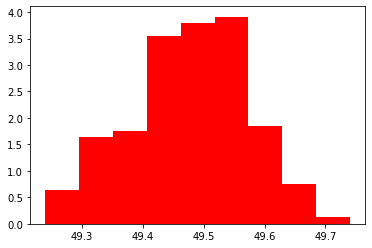

In [19]:
plt.hist(dataframe_10["y_9"], bins = 9, color = "red", density= True)

AAAAAAA


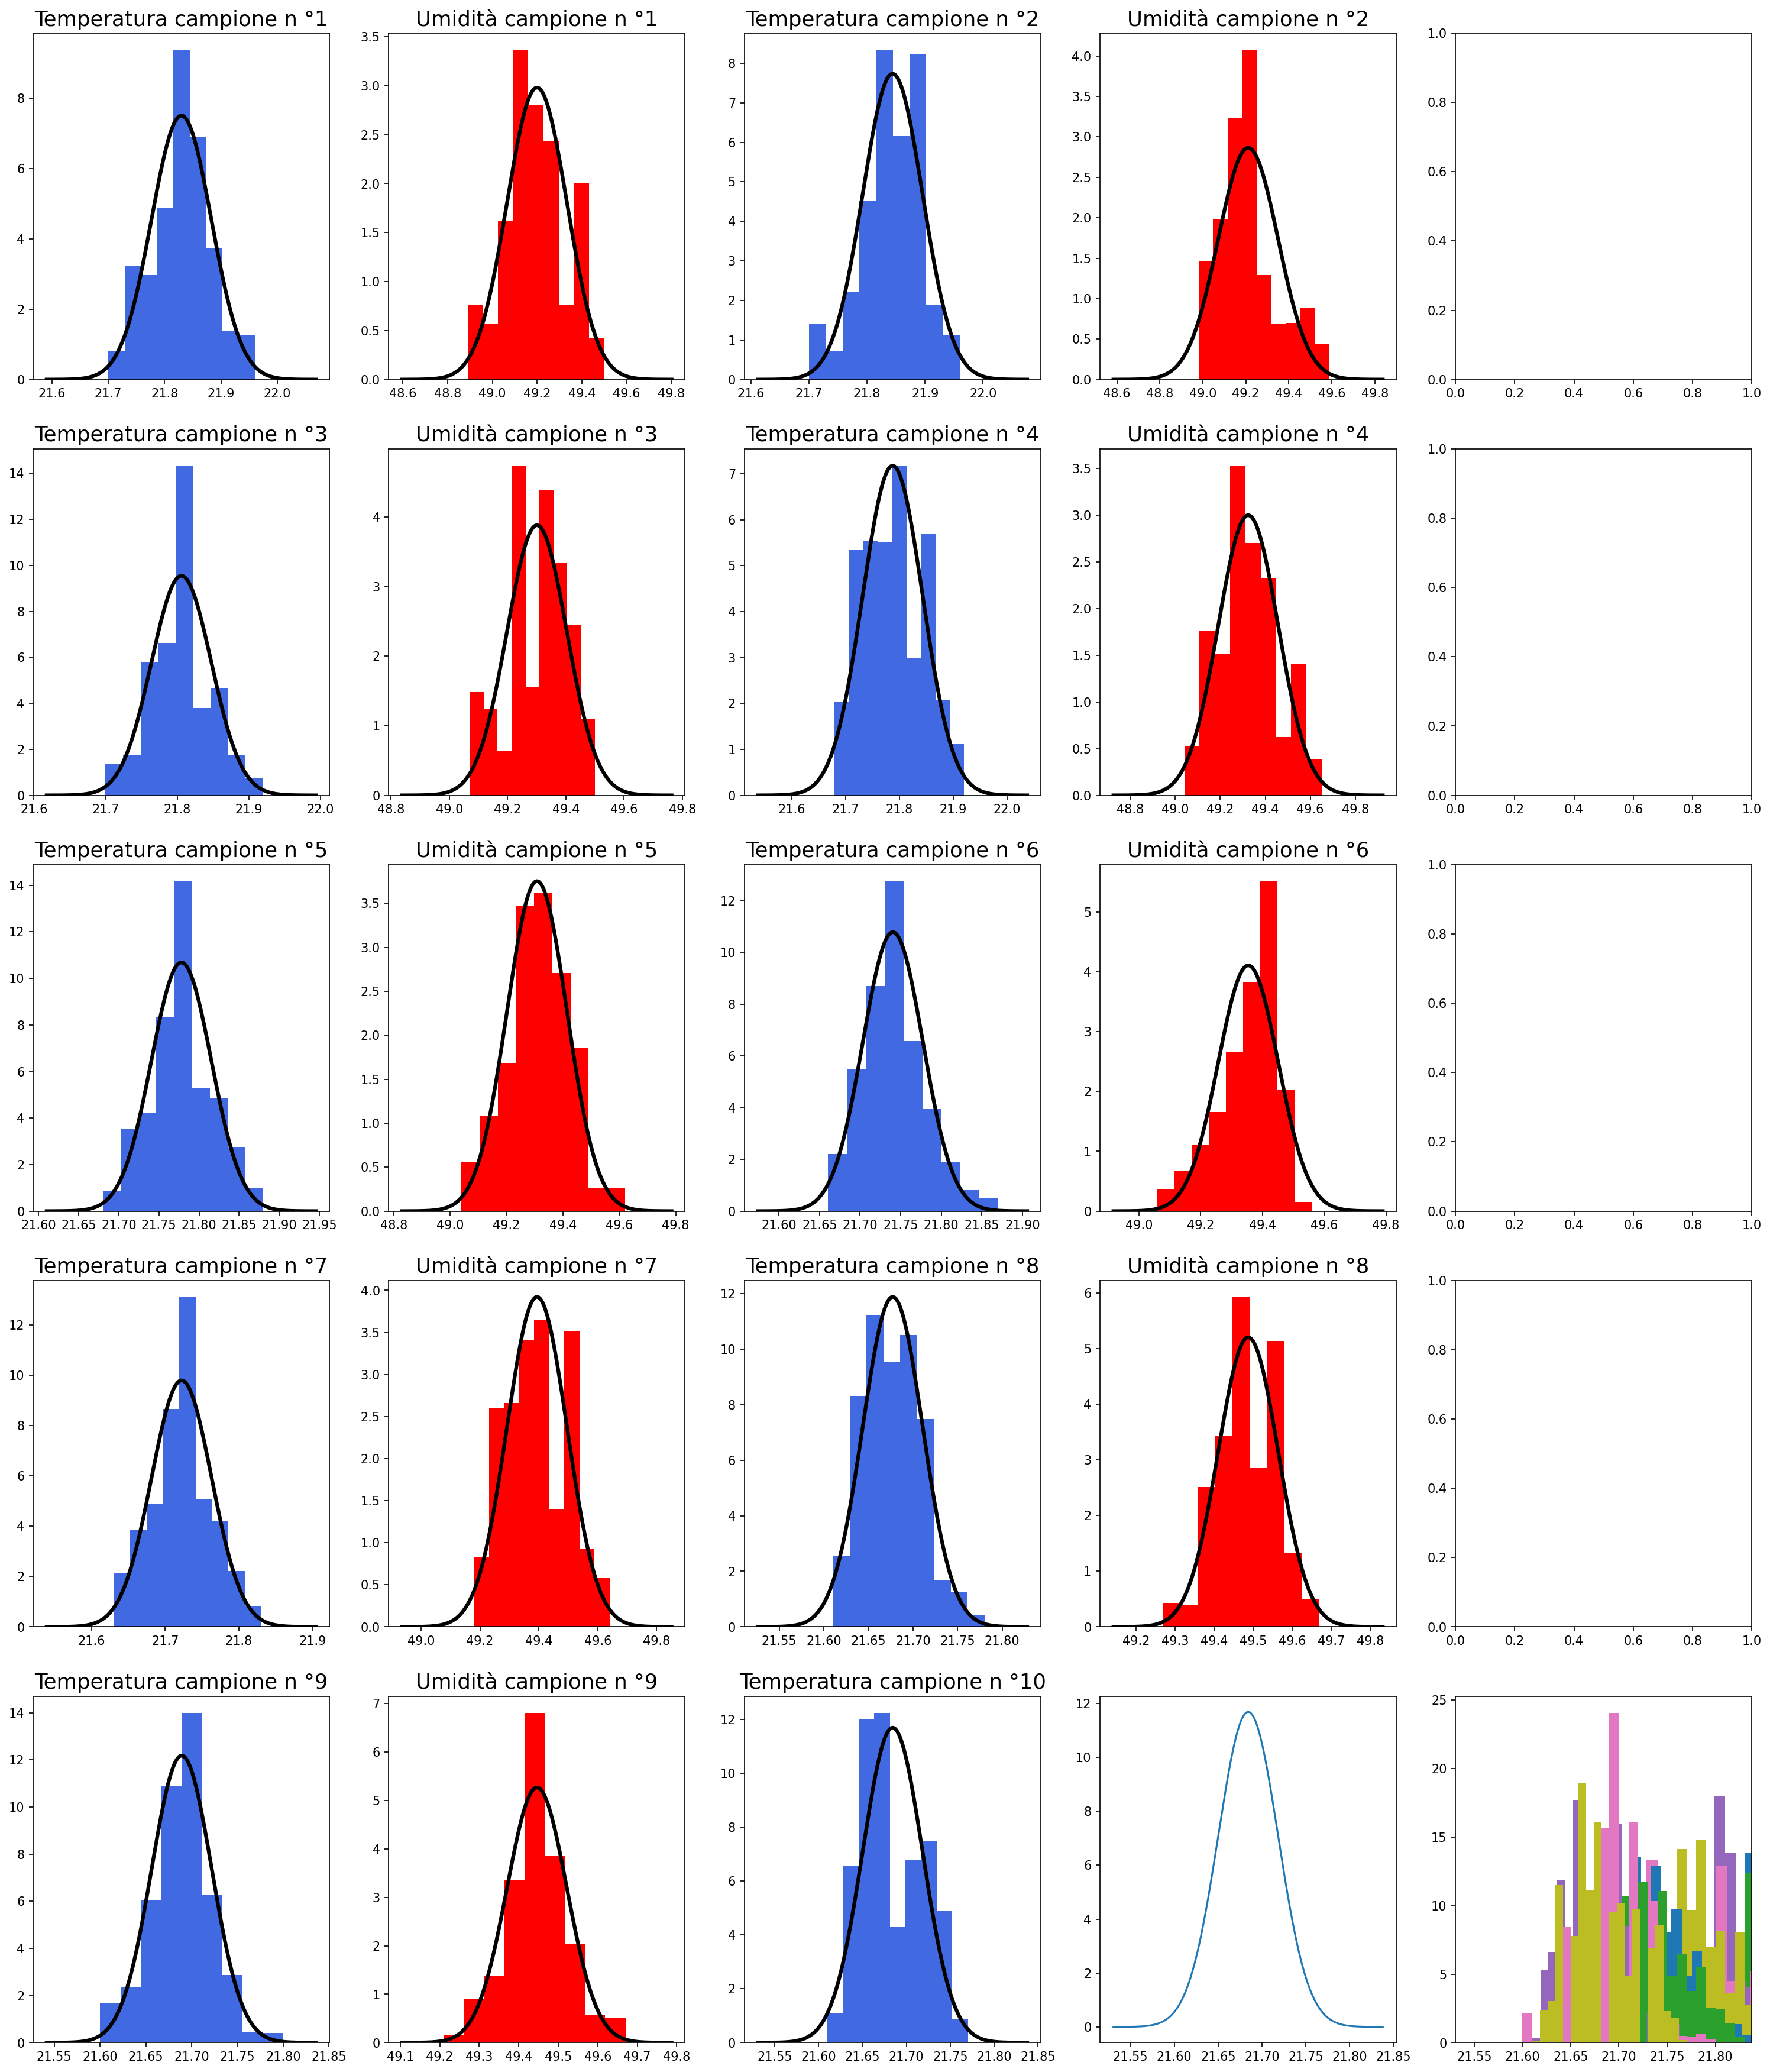

In [22]:
figg, axxsh = plt.subplots(5,5, figsize = (25,30), dpi = 150)
for q in range (20):
    j = q%4
    i = q//4
    half = q//2
    if i == 4 and j ==3:
        print("AAAAAAA")
        axxsh[i,j].plot(g[0], g[1])
        break
    if j== 0 or j==2:
        column= "x_"+str(half)
        axxsh[i,j].hist(dataframe_10[column], bins = 9, color = "royalblue", density = True)
        axxsh[i,j].set_title("Temperatura campione n °" + str(half+1), fontsize = 17)
        g = gaussiana (dataframe_10[column])
        axxsh[i,j].plot(g[0], g[1], color = "black", linewidth = 3)

    else:
        if i == 4 and j ==3:
            break
            print("oiaoiu")
        column= "y_"+str(half)
        axxsh[i,j].hist(dataframe_10[column], bins = 9, color = "red", density= True)
        axxsh[i,j].set_title("Umidità campione n °" + str(half+1), fontsize = 17)
        g = gaussiana (dataframe_10[column])

        axxsh[i,j].plot(g[0], g[1], color = "black", linewidth = 3)
       


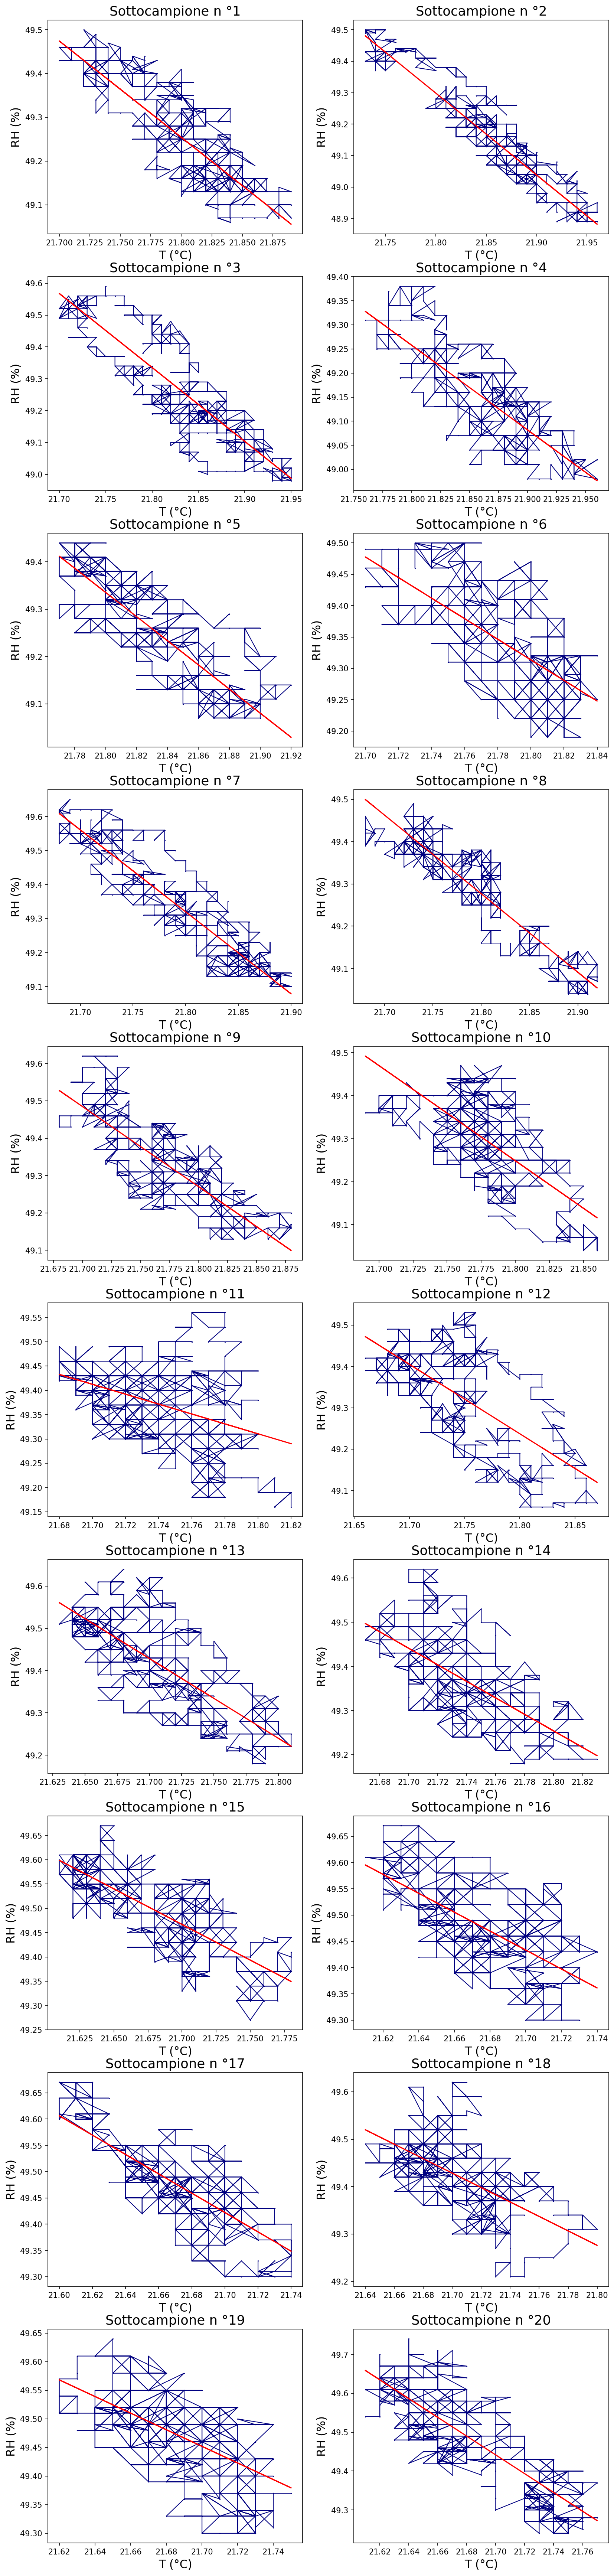

In [24]:
fig, axs = plt.subplots(10,2, figsize = (13,60), dpi = 150)
correlations_20 = []
correlations_errors_20 = []
n_data = 1412
fits_20 = []
dataframe_20 = pd.DataFrame()

for q in range (20):
    j = q%2
    i = q//2
    
    step = q*n_data
    step_1 = step + n_data
    locx ,locy = list(data["temp_corr"][step:step_1]) , list(data["RH_true"][step:step_1])
    localdic = {"x_"+str(q): locx, "y_"+str(q): locy}
    axs[i,j].plot(locx ,locy , "-o", color = "navy", markersize  =0.5, linewidth = 1)
    axs[i,j].set_title("Sottocampione n °" + str(q+1), fontsize = 17)
    axs[i,j].set_ylabel("RH (%)", fontsize = 15)
    axs[i,j].set_xlabel("T (°C)", fontsize = 15)
    localdf= pd.DataFrame(localdic)
    params = fit(locx ,locy, 0.01)
    y_retta = [retta(params[1], params[0], i ) for i in locx]
    axs[i,j].plot(locx, y_retta, color = "red")
    P = localdf["x_"+str(q)].corr(localdf["y_"+str(q)])
    correlations_20.append(P)
    correlations_errors_20.append(error_corr(P, n_data))
    dataframe_20["x_"+str(q)], dataframe_20["y_"+str(q)] = localdf["x_"+str(q)],localdf["y_"+str(q)]
    

**da fare**: distribuzione degli a dei b, mettere guassiane giù e migliorare il binning e le etichette

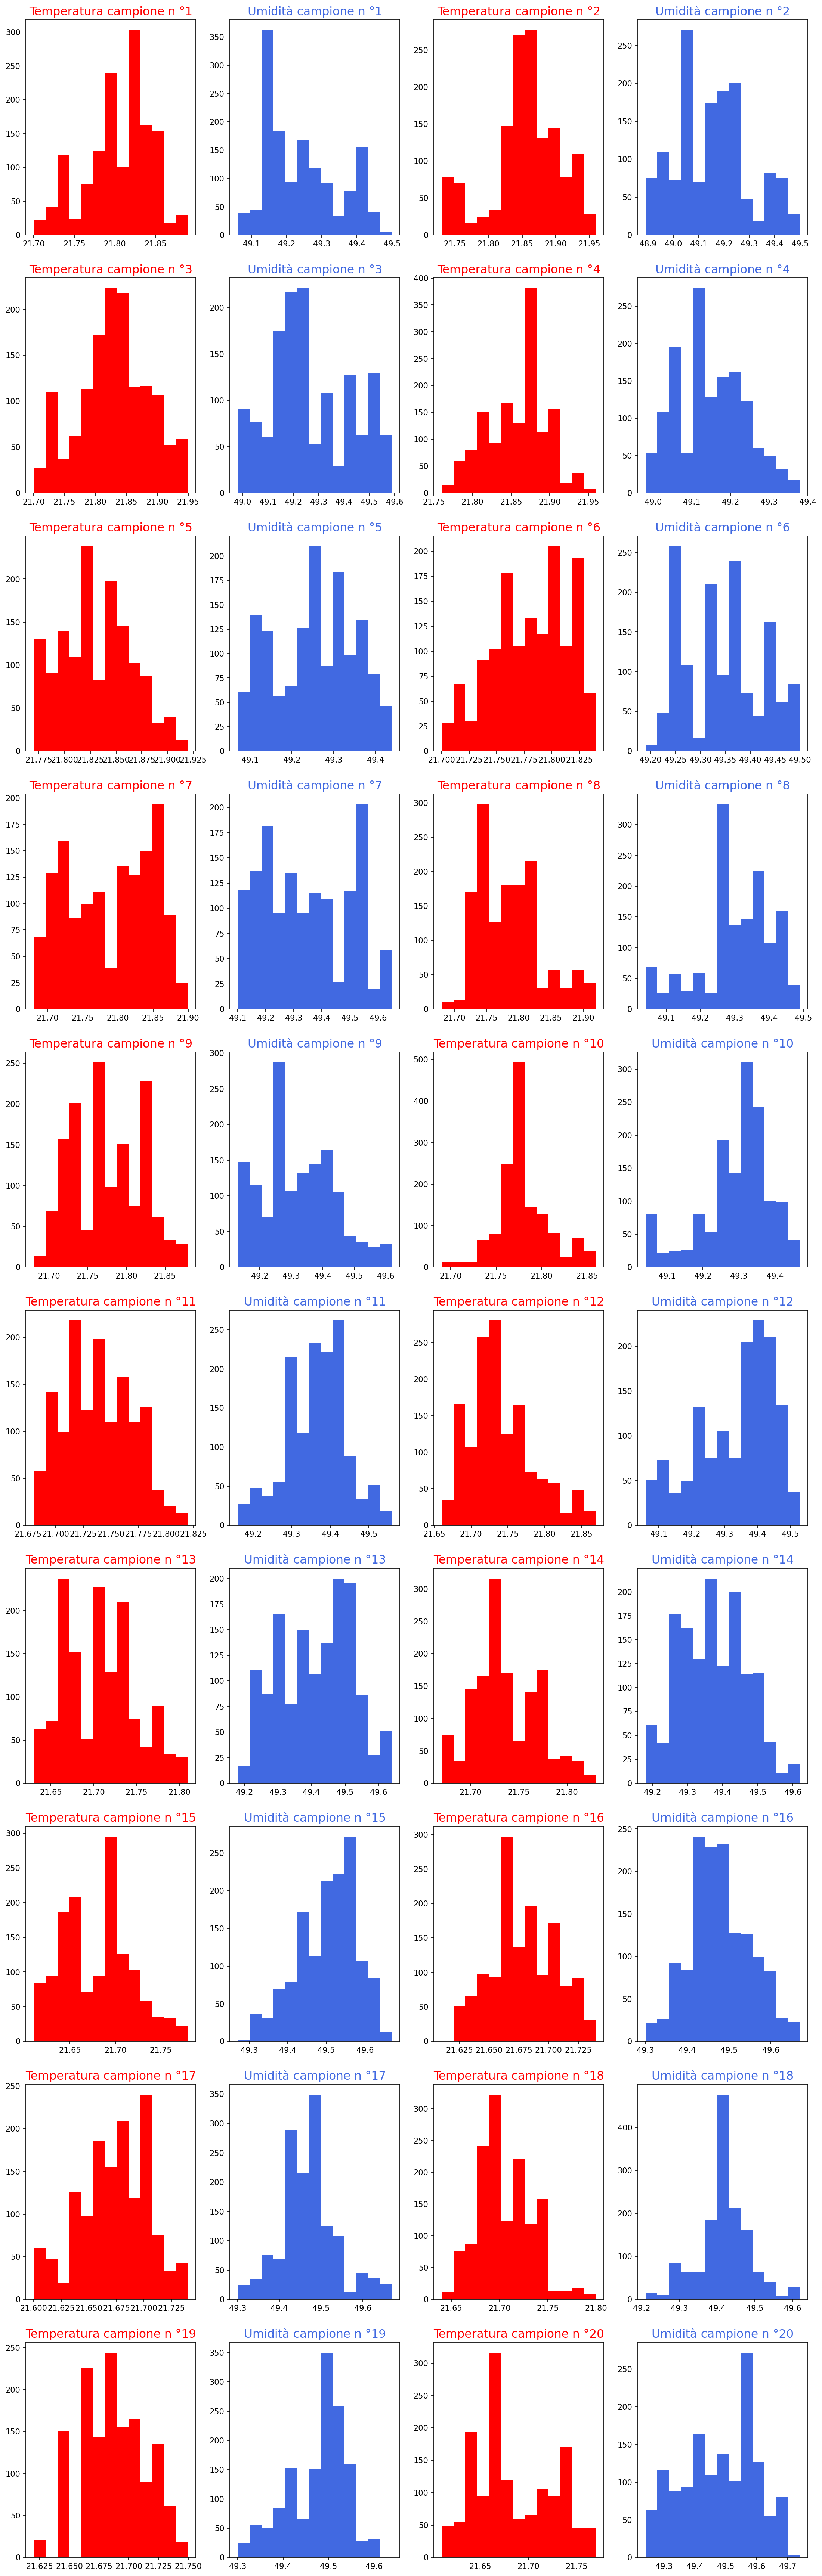

In [20]:
fig, axsh = plt.subplots(10,4, figsize = (18,60), dpi = 150)

for q in range (40):
    j = q%4
    i = q//4
    half = q//2
    if j== 0 or j==2:
        column= "x_"+str(half)
        axsh[i,j].hist(dataframe_20[column], bins = 13,color = "red")
        axsh[i,j].set_title("Temperatura campione n °" + str(half+1), fontsize = 15, color = "red")

    else:
        column= "y_"+str(half)
        axsh[i,j].hist(dataframe_20[column], bins = 13,color = "royalblue")
        axsh[i,j].set_title("Umidità campione n °" + str(half+1), fontsize = 15, color = "royalblue")


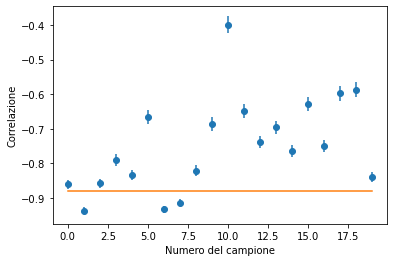

In [21]:
plt.ylabel("Correlazione")
plt.xlabel("Numero del campione")
interval = [i for i in range(len(correlations_20))]
plt.scatter(interval,correlations_20, marker = "o")
plt.errorbar(interval,correlations_20, yerr = correlations_errors_20, ls = "none")
plt.plot(interval, [Pearson for i in range(len(correlations_errors_20))])


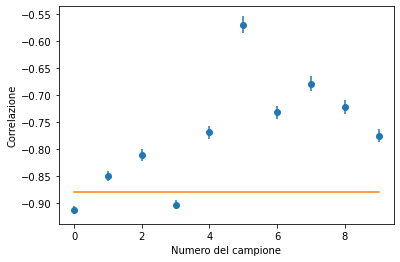

In [28]:
plt.ylabel("Correlazione")
plt.xlabel("Numero del campione")
interval = [i for i in range(len(correlations_10))]
plt.scatter(interval,correlations_10, marker = "o")
plt.errorbar(interval,correlations_10, yerr = correlations_errors_10, ls = "none")
plt.plot(interval, [Pearson for i in range(len(correlations_errors_10))])


(array([2., 1., 1., 1., 1., 2., 1., 0., 0., 1.]),
 array([-0.91175905, -0.87749725, -0.84323544, -0.80897364, -0.77471184,
        -0.74045004, -0.70618823, -0.67192643, -0.63766463, -0.60340282,
        -0.56914102]),
 <BarContainer object of 10 artists>)

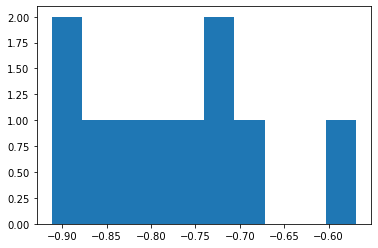

In [29]:
plt.hist(correlations_10)

In [ ]:

media_u= np.mean(data["RH_true"] )
sigma_u =np.std(data["RH_true"] )
x = np.arange(media_u-sigma_u*4.5, media_u+sigma_u*4.5, 0.001)
y = [stats.norm.pdf(i,media_u, sigma_u) for i in x]
b = plt.hist(data["RH_true"] , density = True, bins= 20) 
plt.plot(x,y, color = "red")
plt.xlabel("Umidità relativa (%)")
plt.xlim(media_u-sigma_u*4.5, media_u+sigma_u*4.5)
plt.show()


In [ ]:
b = plt.hist(data["temp_corr"] , density = True) 


In [ ]:
x = np.arange(22.55, 22.85, 0.001)
media_t= np.mean(data["temp_corr"])
sigma_t =np.std(data["temp_corr"])
y = [stats.norm.pdf(i,media_t, sigma_t) for i in x]
b = plt.hist(data["temp_corr"], density = True, bins = 15) 
#a = plt.plot(x,y, color = "red")
plt.xlabel("Temperatura (°C)")

plt.show()


In [23]:
len(data["RH_true"])

28251

ValueError: autodetected range of [nan, nan] is not finite

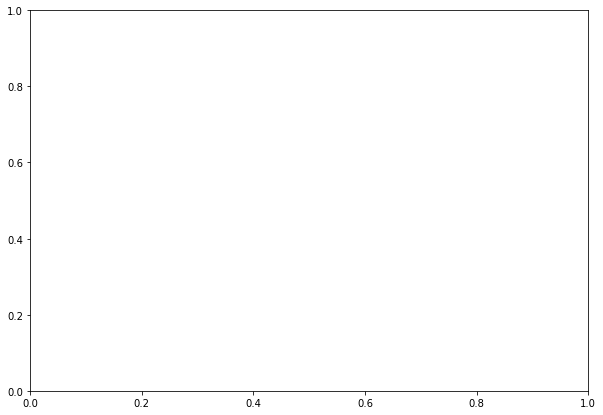

In [24]:
fig = plt.subplots(figsize =(10, 7))

heat = plt.hist2d(data["RH_true"] ,data["temp_corr"] )


In [ ]:
s = 0
correlations = []
sets = []
step = 100
for i in range(step+1,28000,step):
    a =  data["RH_true"][i-step+1:i]
    
    b = data["temp_corr"][i-step+1:i]
    corr = np.corrcoef(a,b)
    s +=1
    sets.append(s)
    
    correlations.append(corr[0,1])

In [ ]:
plt.plot(sets,correlations)

In [ ]:
count = 0
for i in range(len(data["RH_true"])):
    if data["RH_true"][i]<57.5:
        count+=1
        print(i)
print(count)      

In [ ]:
plt.figure(figsize =(7,5),dpi = 100)
plt.scatter(data["hum_corrected"][0:200], data["temp_corr"][0:200], alpha = 0.6, s=6)

In [15]:
data["hum_corrected"][200:400].corr(data["temp_corr"][200:400])

-0.39296413356931253

In [25]:
data["hum_corrected"][1:200].corr(data["temp_corr"][1:200])

-0.8380692341678544